# EDA for COVID-19-Radiography-Database

여기서 진행한 EDA (Exploratory Data Analysis)는 COVIDx-CXR dataset을 생성하는 [create_COVIDx.ipynb](https://github.com/lindawangg/COVID-Net/blob/master/create_COVIDx.ipynb)의 내용을 기반으로 작성되었다. COVIDx-CXR dataset에서는 이 Dataset의 COVID-19 image를 모두 사용했다.

In [2]:
import pandas as pd

## Load metadata.csv

metadata.csv 파일의 인코딩이 unknown 8-bit라서 이를 utf-8로 변경해줘야 한다 (참고: [Link](https://stackoverflow.com/a/58833909)).

In [7]:
covid_meta_data_path = 'COVID-19-Radiography-Database/COVID-19.metadata.csv'
covid_meta_data = pd.read_csv(covid_meta_data_path)
covid_meta_data['CLASS'] = 'covid'
covid_meta_data.head(3)

,FILE NAME,FORMAT,SIZE,URL,CLASS
0,COVID-19(1),PNG,1024*1024,https://www.sciencedirect.com/science/article/...,covid
1,COVID-19(2),PNG,1024*1024,https://www.sciencedirect.com/science/article/...,covid
2,COVID-19(3),PNG,1024*1024,https://www.sciencedirect.com/science/article/...,covid


In [39]:
pneumonia_meta_data_path = 'COVID-19-Radiography-Database/Viral Pneumonia.matadata.csv'
pneumonia_meta_data = pd.read_csv(pneumonia_meta_data_path)
pneumonia_meta_data['CLASS'] = 'pneumonia'
pneumonia_meta_data.head(3)

,FILE NAME,FORMAT,SIZE,URL,CLASS
0,Viral Pneumonia-1,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,pneumonia
1,Viral Pneumonia-2,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,pneumonia
2,Viral Pneumonia-3,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,pneumonia


In [40]:
normal_meta_data_path = 'COVID-19-Radiography-Database/NORMAL.metadata.csv'
normal_meta_data = pd.read_csv(normal_meta_data_path)
normal_meta_data['CLASS'] = 'normal'
normal_meta_data.head(3)

,FILE NAME,FORMAT,SIZE,URL,CLASS
0,NORMAL-1,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,normal
1,NORMAL-2,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,normal
2,NORMAL-3,PNG,1024*1024,https://www.kaggle.com/paultimothymooney/chest...,normal


In [41]:
meta_data = pd.concat([covid_meta_data, pneumonia_meta_data, normal_meta_data], ignore_index=True)
meta_data.head(3)

,FILE NAME,FORMAT,SIZE,URL,CLASS
0,COVID-19(1),PNG,1024*1024,https://www.sciencedirect.com/science/article/...,covid
1,COVID-19(2),PNG,1024*1024,https://www.sciencedirect.com/science/article/...,covid
2,COVID-19(3),PNG,1024*1024,https://www.sciencedirect.com/science/article/...,covid


In [42]:
meta_data['CLASS'].value_counts()

pneumonia    1345
normal       1341
covid         219
Name: CLASS, dtype: int64

## Attirubtes

| Attribute | Description |
|:------|:-----|
| FILE NAME | filename |
| FORMAT | format |
| SIZE | image size |
| URL | reference |
| CLASS | class of legion |

In [12]:
meta_data.dtypes

FILE NAME    object
FORMAT       object
SIZE         object
URL          object
CLASS        object
dtype: object

## Data distribution

### # images

In our current realease, there are 219 COVID-19 positive images, 1341 normal images and 1345 viral pneuomonia images.

In [43]:
n_all = len(meta_data)
n_covid = meta_data['CLASS'].value_counts()['covid']
n_pneumonia = meta_data['CLASS'].value_counts()['pneumonia']
n_normal = meta_data['CLASS'].value_counts()['normal']
print(f'All: {n_all}, COVID-19: {n_covid}, Pneumonia: {n_pneumonia}, Normal: {n_normal}')

All: 2905, COVID-19: 219, Pneumonia: 1345, Normal: 1341


### # images by patient ID

이 Dataset의 metadata에서는 Patient 정보를 제공하지 않고, 논문 출처를 제공한다. 모든 Image를 찾기는 어려워 몇 가지 경우만 살펴보았다.

#### COVID-19(1).png

이 Image는 하나의 논문에서 가져온 CXR image이다 (출처: [First imported case of 2019 novel coronavirus in Canada, presenting as mild pneumonia](https://www.sciencedirect.com/science/article/pii/S0140673620303706)).

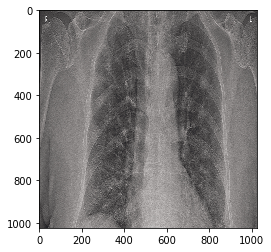

In [54]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('COVID-19-Radiography-Database/COVID-19/COVID-19 (1).png')
plt.imshow(img)

#### COVID-19(2).png ~ COVID(5).png

이 4개의 Image들은 하나의 논문에서 가져온 CXR image이다 (출처: [First case of Coronavirus Disease 2019 (COVID-19) pneumonia in Taiwan](https://www.sciencedirect.com/science/article/pii/S0929664620300449)).

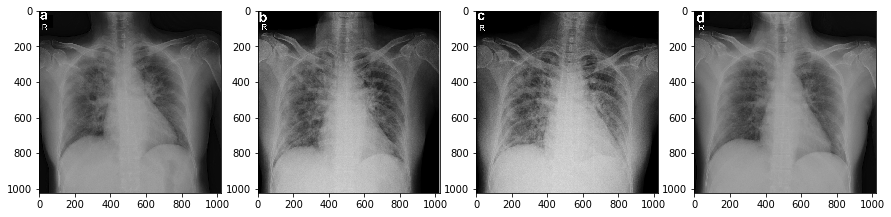

Figure2. Chest X-ray showed progression of prominent bilateral perihilar infiltration and ill-defined patchy opacities at bilateral lungs, which slowly resolved on the follow-up image (a: January 20; b: Jan. 23; c: Jan. 27; d: February 04).


In [63]:
imgs = [cv2.imread(f'COVID-19-Radiography-Database/COVID-19/COVID-19 ({i}).png') for i in range(2, 6)]
fig = plt.figure(figsize=(15, 4))
for i in range(1, 5):
    fig.add_subplot(1, 4, i)
    plt.imshow(imgs[i-1])
    
plt.show()
print('Figure2. Chest X-ray showed progression of prominent bilateral perihilar infiltration and ill-defined patchy opacities at bilateral lungs, which slowly resolved on the follow-up image (a: January 20; b: Jan. 23; c: Jan. 27; d: February 04).')

#### Conclusion

Image가 어떤 환자의 CXR image인지 확인하기 위해서는 출처인 논문을 보고 확인해야 한다.

### Patient types

이 Dataset는 Image는 3개의 Class (COVID-19, Pneumonia, Normal)를 가진다.

## Test dataset

COVIDx-CXR dataset에서 covid-chestxray-dataset에 대해 선택한 Test dataset의 Patient ID들을 살펴보았다.

In [107]:
test_patients = ['COVID-19 (119)', 'COVID-19 (87)', 'COVID-19 (70)', 'COVID-19 (94)', 
                 'COVID-19(215)', 'COVID-19 (77)', 'COVID-19(213)', 'COVID-19 (81)', 
                 'COVID-19(216)', 'COVID-19 (72)', 'COVID-19 (106)', 'COVID-1 (131)', 
                 'COVID-19 (107)', 'COVID-19 (116)', 'COVID-19 (95)', 'COVID-19(214)', 
                 'COVID-19 (129)']

In [99]:
len(test_patients)

17

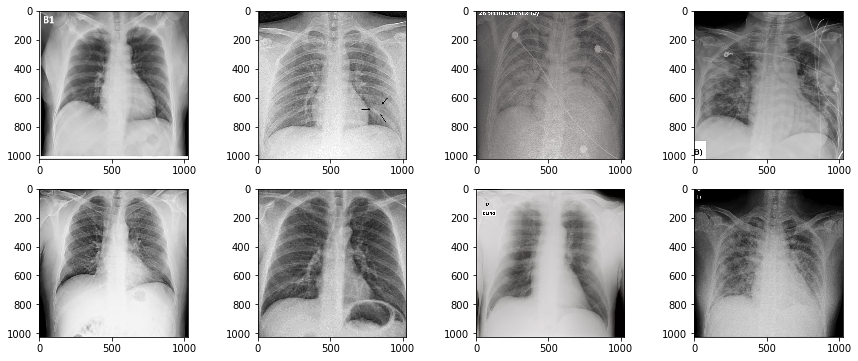

In [111]:
imgs = [cv2.imread(f'COVID-19-Radiography-Database/COVID-19/{test_patient}.png')
        for test_patient in test_patients[:8]]
fig = plt.figure(figsize=(15, 6))
for i, img in enumerate(imgs):
    fig.add_subplot(2, 4, i+1)
    plt.imshow(imgs[i])

## Exclude images

COVIDx-CXR dataset에서 아래 번호를 가진 이미지들을 제외시켰다. 하지만 그 이유는 아직 모른다.

In [83]:
discard = ['100', '101', '102', '103', '104', '105', 
           '110', '111', '112', '113', '122', '123', 
           '124', '125', '126', '217']

In [93]:
pids = pd.DataFrame(covid_meta_data['FILE NAME'].apply(func=lambda x: x[x.find('(')+1:x.find(')')])).rename(columns={'FILE NAME': 'pid'})
discard_imgs = covid_meta_data[pids['pid'].isin(discard)]
discard_imgs.head()

,FILE NAME,FORMAT,SIZE,URL,CLASS
99,COVID-19(100),PNG,1024*1024,https://www.medrxiv.org/content/10.1101/2020.0...,covid
100,COVID-19(101),PNG,1024*1024,https://papers.ssrn.com/sol3/papers.cfm?abstra...,covid
101,COVID-19(102),PNG,1024*1024,https://www.thelancet.com/journals/lancet/arti...,covid
102,COVID-19(103),PNG,1024*1024,https://synapse.koreamed.org/search.php?where=...,covid
103,COVID-19(104),PNG,1024*1024,https://www.medrxiv.org/content/medrxiv/early/...,covid


제외된 첫 번째 Image의 URL을 통해 내용을 살펴봐도 어떤 부분이 제외의 근거가 되는지 모르겠다.

In [97]:
discard_imgs['URL'][99]

'https://www.medrxiv.org/content/10.1101/2020.02.26.20026989v1'

## Conclusion

* COVIDx-CXR dataset에서는 이 Dataset의 COVID-19 image들만 사용했다.
* 전체 219 COVID-19 image 중 17장만 Test dataset으로 사용했다.
* 사용하지 않은 Image들을 왜 사용하지 않았는지 이유는 아직 모른다.